<a href="https://colab.research.google.com/github/limited-fion/deep-learning-cw/blob/master/03_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Only modify the given CNN architecture to **add Dropout or Batch Normalization **layers when explicitly stated. Use **40 epochs** to plot all of your curves. However, you can **train for more epochs to find your best validation performance if your network has not finished training in those 40 epochs.**

In [95]:
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import Adam, SGD
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental import preprocessing

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

def plot_history(history, metric = None):
  # Plots the loss history of training and validation (if existing)
  # and a given metric
  # Be careful because the axis ranges are automatically adapted
  # which may not desirable to compare different runs.
  # Also, in some cases you may want to combine several curves in one
  # figure for easier comparison, which this function does not do.
  
  if metric != None:
    fig, axes = plt.subplots(2,1)
    axes[0].plot(history.history[metric])
    try:
      axes[0].plot(history.history['val_'+metric])
      axes[0].legend(['Train', 'Val'])
    except:
      pass
    axes[0].set_title('{:s}'.format(metric))
    axes[0].set_ylabel('{:s}'.format(metric))
    axes[0].set_xlabel('Epoch')
    fig.subplots_adjust(hspace=0.5)
    axes[1].plot(history.history['loss'])
    try:
      axes[1].plot(history.history['val_loss'])
      axes[1].legend(['Train', 'Val'])
    except:
      pass
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
  else:
    plt.plot(history.history['loss'])
    try:
      plt.plot(history.history['val_loss'])
      plt.legend(['Train', 'Val'])
    except:
      pass
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

# **Default model without any data augmentation**

In [3]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

X_train = X_train.reshape(-1,32,32,3)

## Normalization block
norm_layer = preprocessing.Normalization()
norm_layer.adapt(X_train)
X_train_n = norm_layer(X_train)
X_test_n = norm_layer(X_test)

# You can modify the data_augmentation variable below to add your
# data augmentation pipeline.
# By default we do not apply any augmentation (RandomZoom(0) is equivalent
# to not performing any augmentation)
data_augmentation = keras.Sequential(
    [
        preprocessing.RandomZoom(0)
    ]
)
# We will use glorot_uniform as a initialization by default
initialization = 'glorot_uniform'
# Use the architecture given below, only modify it to add Dropout/BatchNorm
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
# As we use global average pooling, we don't need to use Flatten
model.add(GlobalAveragePooling2D())
model.add(Dense(10, kernel_initializer=initialization))
model.add(Activation('softmax'))


Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)
# By default use Adam with lr=3e-4. Change it to SGD when asked to
opt = Adam(lr=3e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Use 40 epochs as default value to plot your curves
history = model.fit(X_train_n, Y_train_class, epochs=40, validation_data=(X_test_n,Y_test_class))

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000
Epoch 1/40


1563/1563 [==============================] - 250s 158ms/step - loss: 1.5488 - accuracy: 0.4345 - val_loss: 1.2484 - val_accuracy: 0.5516
Epoch 2/40
1563/1563 [==============================] - 215s 138ms/step - loss: 1.1746 - accuracy: 0.5800 - val_loss: 1.0635 - val_accuracy: 0.6198
Epoch 3/40
1563/1563 [==============================] - 213s 137ms/step - loss: 1.0107 - accuracy: 0.6401 - val_loss: 1.0144 - val_accuracy: 0.6406
Epoch 4/40
1563/1563 [==============================] - 216s 138ms/step - loss: 0.9088 - accuracy: 0.6779 - val_loss: 0.9084 - val_accuracy: 0.6807
Epoch 5/40
1563/1563 [==============================] - 213s 137ms/step - loss: 0.8162 - accuracy: 0.7115 - val_loss: 0.8691 - val_accuracy: 0.7021
Epoch 6/40
1563/1563 [==============================] - 216s 138ms/step - loss: 0.7360 - accuracy: 0.7444 - val_loss: 0.7684 - val_accuracy: 0.7346
Epoch 7/40
1563/1563 [==============================] - 215s 137ms/step - loss: 0.6769 - accuracy: 0.7648 - val_loss: 0.817

In [96]:
plot_history(history, 'categorical_accuracy')

NameError: ignored

*   Define two data augmentation strategies (one more aggressive than the other) and train the model with data augmentation. Clearly state the two augmentation strategies you apply (i.e., the specific transformations). Discuss the training and validation loss curves for the two data augmentation strategies along with the original run without data augmentation. 



# **Data augmentation 1 - Flip vertical; Rotation: 0.6**

In [93]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

X_train = X_train.reshape(-1,32,32,3)

## Normalization block
norm_layer = preprocessing.Normalization()
norm_layer.adapt(X_train)
X_train_n = norm_layer(X_train)
X_test_n = norm_layer(X_test)

data_augmentation = keras.Sequential(
    [   
        preprocessing.RandomFlip("vertical"),
        preprocessing.RandomRotation(0.6)
    ]
)

Image shape: (32, 32, 3)
Total number of training samples: 50000
Total number of validation samples: 10000


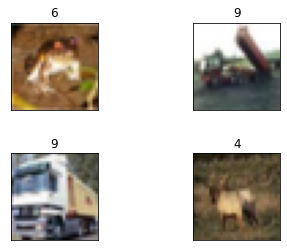

In [92]:
N=2
# fig1 = plt.figure(figsize=(10,10))
# fig1 = plt.imshow(X_train[0], cmap='gray')
start_val = 0 # pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = list(range(0, 10))
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(X_train[idx], cmap='gray')
    fig.subplots_adjust(hspace=0.5)
    y_target = int(y_train[idx])
    target = str(items[y_target])
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
     

In [94]:
# We will use glorot_uniform as a initialization by default
initialization = 'glorot_uniform'
# Use the architecture given below, only modify it to add Dropout/BatchNorm
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
# As we use global average pooling, we don't need to use Flatten
model.add(GlobalAveragePooling2D())
model.add(Dense(10, kernel_initializer=initialization))
model.add(Activation('softmax'))


Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)
# By default use Adam with lr=3e-4. Change it to SGD when asked to
opt = Adam(lr=3e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Use 40 epochs as default value to plot your curves
history = model.fit(X_train_n, Y_train_class, epochs=40, validation_data=(X_test_n,Y_test_class))

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1563/1563 [==============================] - 226s 142ms/step - loss: 1.8586 - accuracy: 0.3196 - val_loss: 1.6051 - val_accuracy: 0.4320
Epoch 2/40
1563/1563 [==============================] - 221s 141ms/step - loss: 1.6153 - accuracy: 0.4192 - val_loss: 1.4448 - val_accuracy: 0.4828
Epoch 3/40
1563/1563 [==============================] - 228s 146ms/step - loss: 1.5041 - accuracy: 0.4621 - val_loss: 1.4085 - val_accuracy: 0.4993
Epoch 4/40
1563/1563 [==============================] - 220s 141ms/step - loss: 1.4346 - accuracy: 0.4860 - val_loss: 1.4403 - val_accuracy: 0.4949
Epoch 5/40
1563/1563 [==============================] - 223s 142ms/step - loss: 1.3763 - accuracy: 0.5085 - val_loss: 1.4141 - val_accuracy: 0.4951
Epoch 6/40
1563/1563 [==============================] - 220s 141ms/step - loss: 1.3240 - accuracy: 0.5268 - val_loss: 1.3567 - val_accuracy: 0.5308
Epoch 7/40
1563/1563 [==============================] - 223s 143ms/step - loss: 1.2764 - accuracy: 0.5459 - val_loss: 1.290

KeyboardInterrupt: ignored

# **Data augmentation 2 - Rotation: 0.8; Zoom height factor: 0.4**

In [ ]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

X_train = X_train.reshape(-1,32,32,3)

## Normalization block
norm_layer = preprocessing.Normalization()
norm_layer.adapt(X_train)
X_train_n = norm_layer(X_train)
X_test_n = norm_layer(X_test)

# You can modify the data_augmentation variable below to add your
# data augmentation pipeline.
# By default we do not apply any augmentation (RandomZoom(0) is equivalent
# to not performing any augmentation)
data_augmentation = keras.Sequential(
    [   
        preprocessing.RandomRotation(0.8),
        preprocessing.RandomZoom(height_factor=0.4)
    ]
)
# We will use glorot_uniform as a initialization by default
initialization = 'glorot_uniform'
# Use the architecture given below, only modify it to add Dropout/BatchNorm
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
# As we use global average pooling, we don't need to use Flatten
model.add(GlobalAveragePooling2D())
model.add(Dense(10, kernel_initializer=initialization))
model.add(Activation('softmax'))


Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)
# By default use Adam with lr=3e-4. Change it to SGD when asked to
opt = Adam(lr=3e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Use 40 epochs as default value to plot your curves
history = model.fit(X_train_n, Y_train_class, epochs=40, validation_data=(X_test_n,Y_test_class))

*   Attach in the appendix those training and validation curves. 



*   Report in a table the best validation accuracy obtained for the three runs (no data augmentation, data augmentation 1, data augmentation 2).



# **Baseline + Dropout**

In [ ]:
print('Image shape: {0}'.format(X_train.shape[1:]))
print('Total number of training samples: {0}'.format(X_train.shape[0]))
print('Total number of validation samples: {0}'.format(X_test.shape[0]))

X_train = X_train.reshape(-1,32,32,3)

## Normalization block
norm_layer = preprocessing.Normalization()
norm_layer.adapt(X_train)
X_train_n = norm_layer(X_train)
X_test_n = norm_layer(X_test)

# You can modify the data_augmentation variable below to add your
# data augmentation pipeline.
# By default we do not apply any augmentation (RandomZoom(0) is equivalent
# to not performing any augmentation)
data_augmentation = keras.Sequential(
    [   
        preprocessing.RandomRotation(0.8),
        preprocessing.RandomZoom(height_factor=0.4)
    ]
)
# We will use glorot_uniform as a initialization by default
initialization = 'glorot_uniform'
# Use the architecture given below, only modify it to add Dropout/BatchNorm
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=initialization))
model.add(Activation('relu'))
# As we use global average pooling, we don't need to use Flatten
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.add(Dense(10, kernel_initializer=initialization))
model.add(Activation('softmax'))


Y_train_class = np_utils.to_categorical(y_train, 10)
Y_test_class = np_utils.to_categorical(y_test, 10)
# By default use Adam with lr=3e-4. Change it to SGD when asked to
opt = Adam(lr=3e-4)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Use 40 epochs as default value to plot your curves
history = model.fit(X_train_n, Y_train_class, epochs=40, validation_data=(X_test_n,Y_test_class))